In [1]:
import numpy as np
import pandas as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pdr.get_data_yahoo('RELIANCE.NS')
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-04,1967.800049,1911.000000,1950.000000,1916.599976,10083693.0,1916.599976
2021-05-05,1938.500000,1908.050049,1923.349976,1920.099976,5719649.0,1920.099976
2021-05-06,1935.000000,1906.599976,1921.849976,1931.000000,6749281.0,1931.000000
2021-05-07,1955.650024,1926.000000,1937.750000,1931.750000,5671163.0,1931.750000
2021-05-10,1945.500000,1922.699951,1939.000000,1929.099976,1592687.0,1929.099976


In [3]:
n = 3
pct = data.Close.pct_change(n)
pct = pct.dropna()

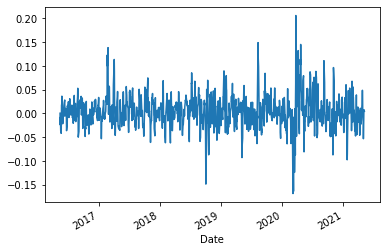

In [4]:
pct.plot()
plt.show()

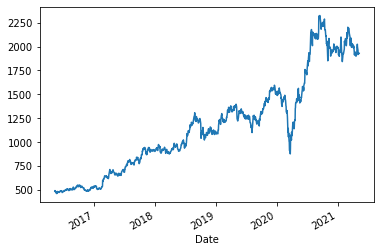

In [5]:
data.Close.plot()
plt.show()

### Clustering with K-means

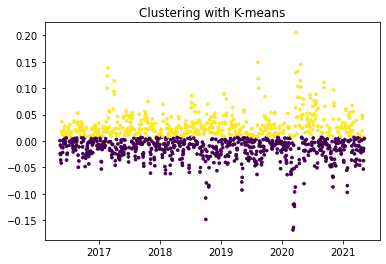

In [6]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=2, init = 'k-means++',n_jobs=-1,verbose = 1)
KM.fit(pct.values.reshape(-1,1))

lat_var = KM.predict(pct.values.reshape(-1,1))

plt.plot(pct,alpha = 0.0, c = 'gray',)
plt.scatter(data.index[n:], pct, c = lat_var, s=7)
plt.title('Clustering with K-means')
plt.plot()

plt.savefig('kmean-cluster.png')

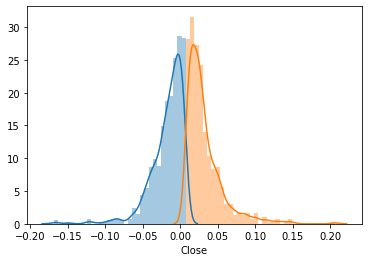

In [7]:
sns.distplot(pct[lat_var == 0])
sns.distplot(pct[lat_var == 1])

plt.savefig('kmean-cluster1.png')

### Clustering with gaussian mixture model

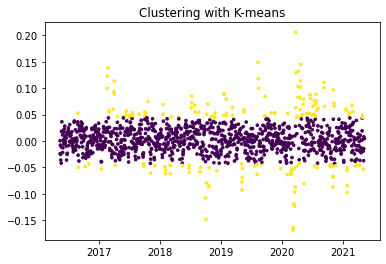

In [8]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components = 2 , max_iter = 200)
GMM.fit(pct.values.reshape(-1,1))

lat_var = GMM.predict(pct.values.reshape(-1,1))

plt.plot(pct,alpha = 0.0, c = 'gray')
plt.scatter(data.index[n:], pct, c = lat_var, s=7)
plt.title('Clustering with K-means')
plt.plot()

plt.savefig('gmm-cluster.png')

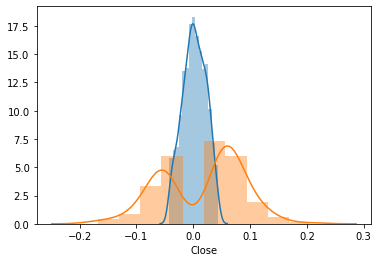

In [9]:
sns.distplot(pct[lat_var == 0]) # low volatility
sns.distplot(pct[lat_var == 1]) # high volatility

plt.savefig('gmm-cluster1.png')

From the above figures, we can see K-Means completely fails to cluster the high volatility and low volatility. While, GMM is quite successful in clustering the two volatilities